# Quirks in folium

In [1]:
import os
import sys
print('Python: {}'.format(sys.version))
print('Currrent dir:', os.path.abspath(os.path.curdir))
# if notebook inside another folder, eg ./notebooks:
sys.path.insert(0, os.path.abspath(os.path.join(os.path.curdir, '..')))

%load_ext autoreload
%autoreload 2

Python: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
Currrent dir: C:\Users\catch\Documents\GitHub\Geocoders_Comparison\notebooks


In [2]:
import requests
from io import BytesIO
from PIL import Image
from IPython.display import Image as disp_Image
from IPython.display import HTML

from GeocodersComparison import gc4settings, gc4utils

# Check notebook environment:
LAB = gc4utils.is_lab_notebook()
if LAB:
    from IPython.display import Markdown

In [3]:
# Show warning
gc4utils.check_notebook()

### This is a <span style="color:red;">JupyterLab notebook               </span>: Use `IPython.display.Markdown()` if referencing variables;               {{var}} does not work.

---
## Folium example: add floating image ona map:

In [4]:
import folium
from folium.plugins import FloatImage

The `FloatImage` docstring does not mention any restriction:
> Adds a floating image in HTML canvas on top of the map.

## Case 1:  
### Image from url link: &#9989;

In [5]:
url = ('https://raw.githubusercontent.com/SECOORA/static_assets/master/maps/img/rose.png')

m = folium.Map([-13, -38.15], zoom_start=10);
FloatImage(url, bottom=70, left=65).add_to(m)
m

## Case 2:  
### Image from saved file: &#10060; (whether the path is relative or not)

### First, save the file locally:  
Download image from Folium example (request content is binary):

In [6]:
dir_img = gc4settings.DIR_IMG

r = requests.get(url)
img = Image.open(BytesIO(r.content))
img.save(os.path.join(dir_img,'rose.png'))

#### Set the relative and absolute paths:

In [7]:
dir_rel_img = os.path.join(os.path.relpath(dir_img), 'rose.png')
dir_abs_img = os.path.join(dir_img, 'rose.png')

#### Show image using each to show there is nothing wrong with the saving or accessing mode:

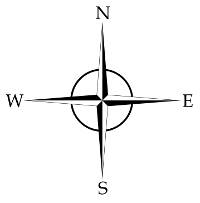

In [8]:
disp_Image(dir_rel_img)

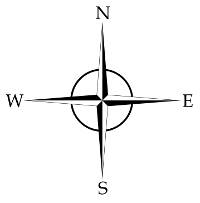

In [9]:
disp_Image(dir_abs_img)

### Recreate map with local image - Realtive path: &#10060;

In [10]:
m = folium.Map([-13, -38.15], zoom_start=10);
FloatImage(dir_rel_img, bottom=70, left=65).add_to(m);
m

### Recreate map with local image - Absolute path: &#10060;

In [11]:
m = folium.Map([-13, -38.15], zoom_start=10);
FloatImage(dir_abs_img, bottom=70, left=65).add_to(m);
m

In [12]:
not LAB or Markdown("## Need to test in classic Jupyter notebook.")

## Need to test in classic Jupyter notebook.

---

In [13]:
gc4utils.caveat_codor()

The code and information herein is valid given my understanding and this environment:<br>3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)] | win32<br>As of:  April 2019